In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


In [4]:
dataset=pd.read_csv('earthquake_alert_balanced_dataset (1).csv')

In [5]:

print("Duplicate Rows:", dataset.duplicated().sum())
df = dataset.drop_duplicates()


Duplicate Rows: 44


In [6]:
dataset_cleaned = dataset.drop_duplicates()

In [7]:
dataset_cleaned.to_csv("earthquake_magnitude_cleaned.csv", index=False)

print("Duplicate rows after removal:", dataset_cleaned.duplicated().sum())
print("Cleaned dataset shape:", dataset_cleaned.shape)


Duplicate rows after removal: 0
Cleaned dataset shape: (1256, 6)


In [8]:
scaler = StandardScaler()  
scaled_data = scaler.fit_transform(dataset.select_dtypes(include=np.number))

scaled_df = pd.DataFrame(scaled_data, columns=df.select_dtypes(include=np.number).columns)
print("Scaled Data (first 5 rows):\n", scaled_df.head())

Scaled Data (first 5 rows):
    magnitude     depth       cdi       mmi       sig
0  -0.144031 -0.348214  0.456257  0.044873  0.156686
1  -0.380116 -0.242757 -1.326265 -2.170372 -0.373679
2  -0.144031  5.068429 -1.771896 -2.908786 -0.052245
3   0.564227 -0.127713 -0.880635 -1.431957  1.201345
4  -1.088374  5.499843 -3.108788 -3.647201 -1.418338


In [9]:
print(dataset.head())
print(dataset.info())

   magnitude  depth  cdi  mmi   sig  alert
0        7.0   14.0  8.0  7.0   0.0  green
1        6.9   25.0  4.0  4.0 -33.0  green
2        7.0  579.0  3.0  3.0 -13.0  green
3        7.3   37.0  5.0  5.0  65.0  green
4        6.6  624.0  0.0  2.0 -98.0  green
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   magnitude  1300 non-null   float64
 1   depth      1300 non-null   float64
 2   cdi        1300 non-null   float64
 3   mmi        1300 non-null   float64
 4   sig        1300 non-null   float64
 5   alert      1300 non-null   object 
dtypes: float64(5), object(1)
memory usage: 61.1+ KB
None


In [10]:
X = dataset.iloc[:, :-1]   
y = dataset.iloc[:, -1]   


In [11]:
print("Features (X):")
print(X.head())  
print("\nTarget (y):")
print(y.head())  


Features (X):
   magnitude  depth  cdi  mmi   sig
0        7.0   14.0  8.0  7.0   0.0
1        6.9   25.0  4.0  4.0 -33.0
2        7.0  579.0  3.0  3.0 -13.0
3        7.3   37.0  5.0  5.0  65.0
4        6.6  624.0  0.0  2.0 -98.0

Target (y):
0    green
1    green
2    green
3    green
4    green
Name: alert, dtype: object


In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


model = make_pipeline(
    StandardScaler(),
    LogisticRegression(max_iter=2000, solver="lbfgs")
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [14]:

print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.6282051282051282

Classification Report:
               precision    recall  f1-score   support

       green       0.81      0.77      0.79       104
      orange       0.59      0.35      0.44       103
         red       0.67      0.83      0.74        94
      yellow       0.45      0.57      0.50        89

    accuracy                           0.63       390
   macro avg       0.63      0.63      0.62       390
weighted avg       0.64      0.63      0.62       390


Confusion Matrix:
 [[80  4  3 17]
 [ 0 36 24 43]
 [ 0 13 78  3]
 [19  8 11 51]]


In [15]:
y_prob = model.predict_proba(X_test)
print("Predicted Probabilities:\n", y_prob[:5]) 

Predicted Probabilities:
 [[2.02376058e-03 3.76979848e-01 5.29142608e-01 9.18537832e-02]
 [3.09642293e-03 2.49867631e-01 6.64966825e-01 8.20691207e-02]
 [9.92341582e-01 1.08598672e-05 4.11846982e-07 7.64714613e-03]
 [3.81227810e-03 6.11123780e-01 2.35843963e-01 1.49219979e-01]
 [5.88156533e-03 3.88061664e-01 4.43008344e-01 1.63048426e-01]]


In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn import tree

In [17]:
print("Decision Tree model trained successfully!")
print("Number of features:", model.n_features_in_)
print("Classes:", model.classes_)


Decision Tree model trained successfully!
Number of features: 5
Classes: ['green' 'orange' 'red' 'yellow']


In [18]:
print(" Accuracy:", accuracy_score(y_test, y_pred))
print(" Classification Report:\n", classification_report(y_test, y_pred))
print(" Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


 Accuracy: 0.6282051282051282
 Classification Report:
               precision    recall  f1-score   support

       green       0.81      0.77      0.79       104
      orange       0.59      0.35      0.44       103
         red       0.67      0.83      0.74        94
      yellow       0.45      0.57      0.50        89

    accuracy                           0.63       390
   macro avg       0.63      0.63      0.62       390
weighted avg       0.64      0.63      0.62       390

 Confusion Matrix:
 [[80  4  3 17]
 [ 0 36 24 43]
 [ 0 13 78  3]
 [19  8 11 51]]


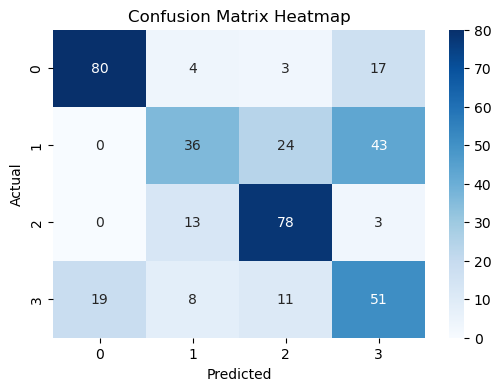

In [19]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap="Blues", fmt="d")
plt.title("Confusion Matrix Heatmap")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

knn = KNeighborsClassifier(n_neighbors=5) 
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


In [21]:
print(" K-Nearest Neighbours Performance")


 K-Nearest Neighbours Performance


In [22]:
print("Accuracy:", accuracy_score(y_test, y_pred_knn))

Accuracy: 0.7076923076923077


In [23]:
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

Classification Report:
               precision    recall  f1-score   support

       green       0.75      0.49      0.59       104
      orange       0.68      0.75      0.71       103
         red       0.82      0.80      0.81        94
      yellow       0.63      0.82      0.71        89

    accuracy                           0.71       390
   macro avg       0.72      0.71      0.71       390
weighted avg       0.72      0.71      0.70       390



In [24]:
from sklearn.svm import SVC
svm = SVC(kernel="rbf", probability=True)  
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)

In [25]:
print(" Support Vector Machine Performance")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Classification Report:", classification_report(y_test, y_pred_svm))

 Support Vector Machine Performance
Accuracy: 0.46923076923076923
Classification Report:               precision    recall  f1-score   support

       green       0.61      0.45      0.52       104
      orange       0.36      0.41      0.38       103
         red       0.45      0.69      0.54        94
      yellow       0.59      0.33      0.42        89

    accuracy                           0.47       390
   macro avg       0.50      0.47      0.47       390
weighted avg       0.50      0.47      0.47       390



In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [28]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
y_pred_rf = rf_model.predict(X_test)


In [30]:
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.9115384615384615

Classification Report:
               precision    recall  f1-score   support

       green       0.92      0.84      0.88        68
      orange       0.91      0.95      0.93        73
         red       0.98      0.95      0.97        64
      yellow       0.83      0.91      0.87        55

    accuracy                           0.91       260
   macro avg       0.91      0.91      0.91       260
weighted avg       0.91      0.91      0.91       260


Confusion Matrix:
 [[57  4  0  7]
 [ 0 69  1  3]
 [ 0  3 61  0]
 [ 5  0  0 50]]


In [31]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC




In [32]:
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM": SVC(kernel='linear', random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}




In [33]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")


Decision Tree Accuracy: 0.8846
KNN Accuracy: 0.7731
SVM Accuracy: 0.6077
Random Forest Accuracy: 0.9115


In [34]:
print("\nModel Comparison:")
for model_name, acc in results.items():
    print(f"{model_name}: {acc:.4f}")



Model Comparison:
Decision Tree: 0.8846
KNN: 0.7731
SVM: 0.6077
Random Forest: 0.9115


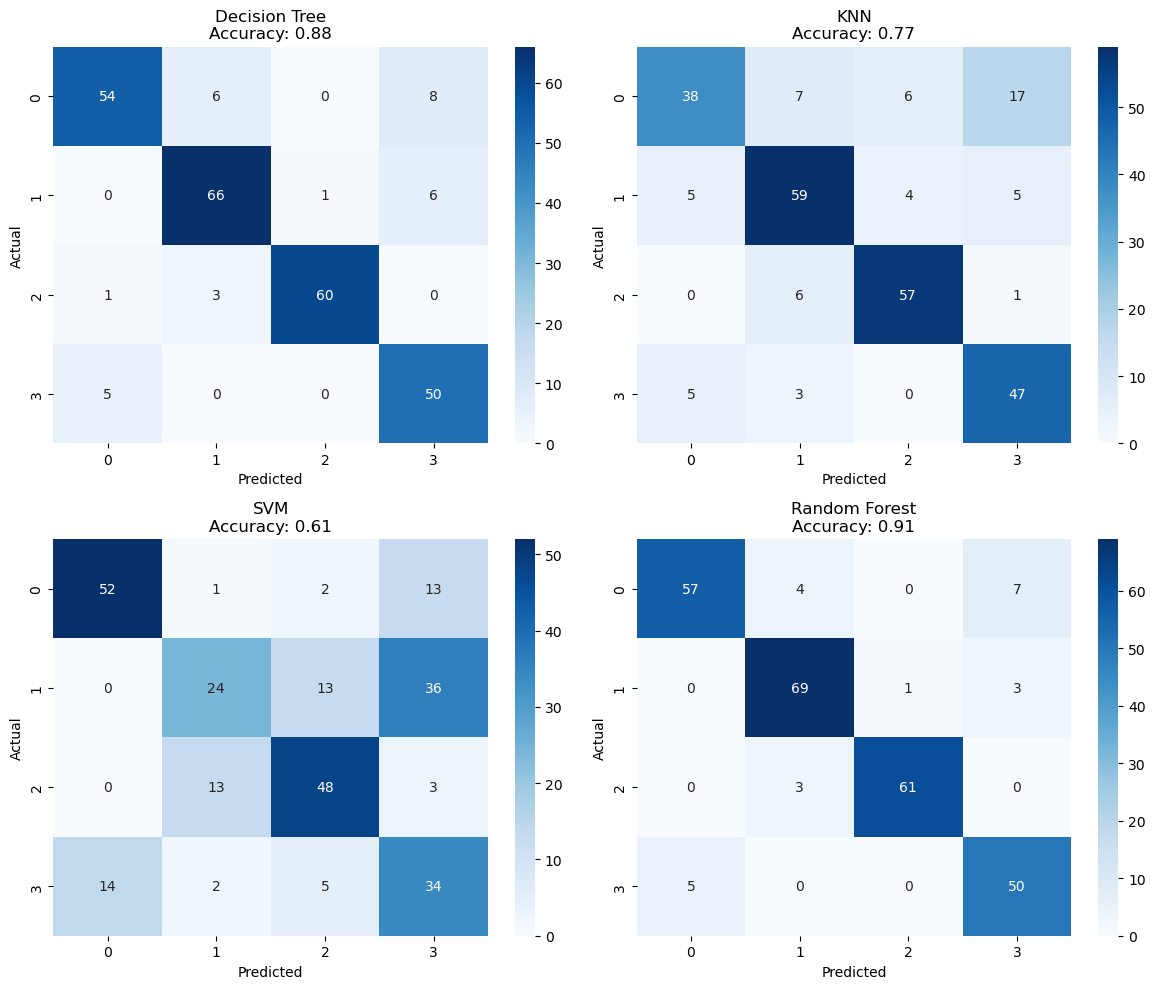

In [35]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
   
    cm = confusion_matrix(y_test, y_pred)
    
  
    acc = accuracy_score(y_test, y_pred)
    
   
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", ax=axes[idx])
    axes[idx].set_title(f"{name}\nAccuracy: {acc:.2f}")
    axes[idx].set_xlabel("Predicted")
    axes[idx].set_ylabel("Actual")

plt.tight_layout()
plt.show()


In [53]:
gb_model = GradientBoostingClassifier(
    n_estimators=200,    
    learning_rate=0.1,    
    max_depth=3,           
    random_state=42
)
gb_model.fit(X_train, y_train)



GradientBoostingClassifier(n_estimators=200, random_state=42)

In [54]:
y_pred = gb_model.predict(X_test)



In [55]:
print("Test Accuracy:", accuracy_score(y_test, y_pred))


Test Accuracy: 0.926923076923077


In [56]:
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

       green       0.97      0.88      0.92        65
      orange       0.91      0.97      0.94        65
         red       0.97      0.95      0.96        65
      yellow       0.87      0.91      0.89        65

    accuracy                           0.93       260
   macro avg       0.93      0.93      0.93       260
weighted avg       0.93      0.93      0.93       260

Confusion Matrix:
 [[57  0  2  6]
 [ 0 63  0  2]
 [ 1  1 62  1]
 [ 1  5  0 59]]


In [57]:
le = LabelEncoder()
y = le.fit_transform(y)



In [58]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



In [59]:
param_grid = {
    "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 5],
    "min_samples_split": [2, 5]
}


In [60]:
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV


In [61]:
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)


In [62]:
from sklearn.ensemble import GradientBoostingClassifier


In [63]:
grid = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=cv,
    scoring="accuracy",
    n_jobs=-1
)



In [71]:
grid.fit(X_train, y_train)



GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='accuracy')

In [68]:
print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)



Best Parameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_split': 5, 'n_estimators': 200}
Best CV Accuracy: 0.8875025681175837


In [81]:
print("\nClassification Report:\n", 
      classification_report(y_test, y_pred, target_names=[str(c) for c in le.classes_]))


Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        65
           1       0.92      0.91      0.91        65
           2       0.94      0.95      0.95        65
           3       0.86      0.91      0.88        65

    accuracy                           0.92       260
   macro avg       0.92      0.92      0.92       260
weighted avg       0.92      0.92      0.92       260



In [84]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)



In [85]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

print("\nTest Accuracy:", accuracy_score(y_test, y_pred))




Test Accuracy: 0.9153846153846154


In [86]:
print("\nClassification Report:\n", 
      classification_report(y_test, y_pred, target_names=[str(c) for c in le.classes_]))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.89      0.92        65
           1       0.92      0.91      0.91        65
           2       0.94      0.95      0.95        65
           3       0.86      0.91      0.88        65

    accuracy                           0.92       260
   macro avg       0.92      0.92      0.92       260
weighted avg       0.92      0.92      0.92       260

Confusion Matrix:
 [[58  0  1  6]
 [ 2 59  1  3]
 [ 1  1 62  1]
 [ 0  4  2 59]]


In [90]:
results = {
    'Decision Tree':  0.6282051282051282,
    'KNN': 0.7076923076923077,
    'SVM': 0.46923076923076923,
    'Logistic Regression':  0.6282051282051282,
    'Random Forest': 0.9115384615384615,

    'Gradient Boosting': 0.926923076923077
}


In [91]:

models = list(results.keys())
accuracies = list(results.values())


<BarContainer object of 6 artists>

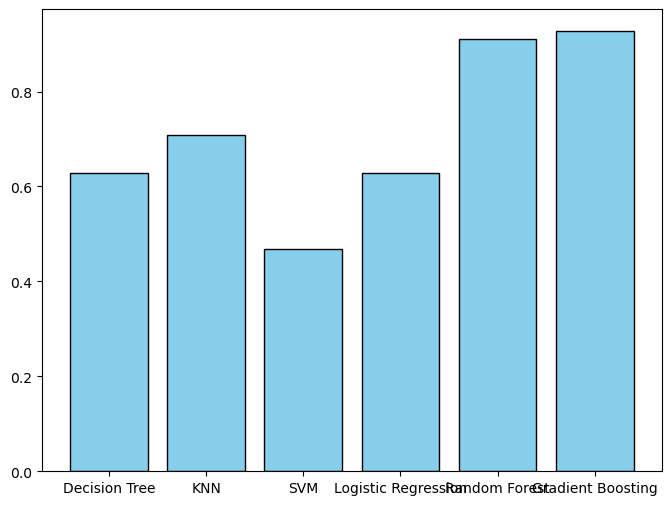

In [92]:
plt.figure(figsize=(8,6))
plt.bar(models, accuracies, color='skyblue', edgecolor='black')
